# Food Consumption Analysis - Hypothesis Testing

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

## Introduction

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [4]:
food = pd.read_csv("data/food_consumption.csv")
food

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,dairy,21.91,31.21
1426,Bangladesh,wheat,17.47,3.33
1427,Bangladesh,rice,171.73,219.76
1428,Bangladesh,soybeans,0.61,0.27


Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [3]:
food.groupby('food_category').describe()[['consumption']]['consumption','50%'].sort_values(ascending=False).head(1)

food_category
dairy    110.975
Name: (consumption, 50%), dtype: float64

In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

<AxesSubplot:xlabel='co2_emission', ylabel='food_category'>

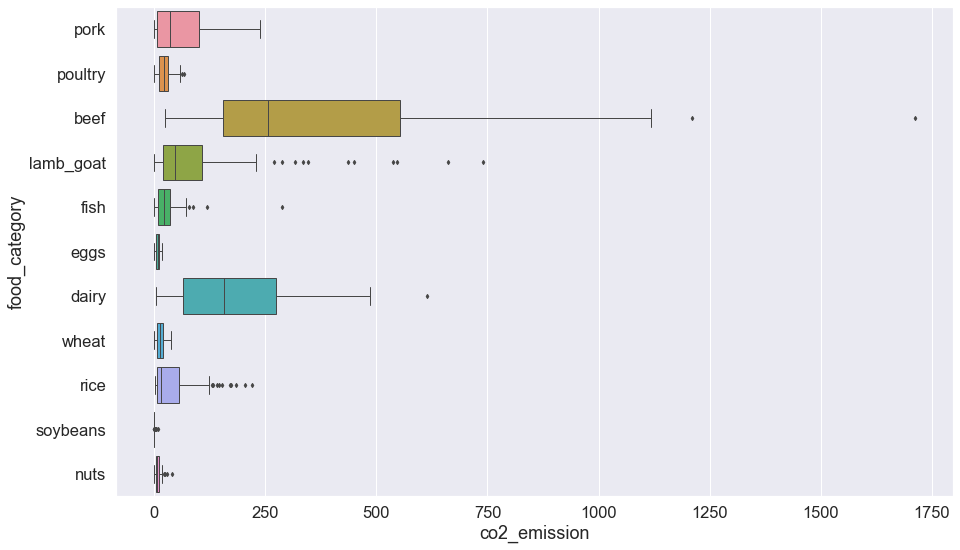

In [4]:
sns.boxplot(x = 'co2_emission', y = 'food_category', data = food, fliersize=3, linewidth=1)

In [5]:
food_cat = food["food_category"].unique()
iqrs = {}
for val in food_cat:
    food_categ = food[food["food_category"] == val]["co2_emission"]
    q1, q3 = np.percentile(food_categ, [25, 75])
    iqr_range = q3 - q1
    print(f"IQR of {val} is: {iqr_range}")
    iqrs[val] = iqr_range
print("__________________________________________")
print(f"The food category that has the highest IQR is {max(iqrs, key=iqrs.get)} with: {max(iqrs.values())}")

IQR of pork is: 92.52
IQR of poultry is: 20.230000000000004
IQR of beef is: 399.37749999999994
IQR of lamb_goat is: 89.03750000000001
IQR of fish is: 25.27
IQR of eggs is: 7.6850000000000005
IQR of dairy is: 209.2725
IQR of wheat is: 12.645000000000001
IQR of rice is: 49.55
IQR of soybeans is: 0.29
IQR of nuts is: 6.734999999999999
__________________________________________
The food category that has the highest IQR is beef with: 399.37749999999994


Looking at the chart from the previous step, which is the `food_category` with the highest median `co2_emission` value? 

In [6]:
food_cat = food["food_category"].unique()
medians = {}
for val in food_cat:
    food_categ = food[food["food_category"] == val]["co2_emission"]
    median = np.median(food_categ)
    print(f"Median of {val} is: {median}")
    medians[val] = median
print("__________________________________________")
print(f"The food category that has the highest median of co2_emission value is {max(medians, key=medians.get)} with: {max(medians.values())}")
    

Median of pork is: 36.650000000000006
Median of poultry is: 21.325
Median of beef is: 255.655
Median of lamb_goat is: 46.405
Median of fish is: 22.27
Median of eggs is: 7.734999999999999
Median of dairy is: 158.075
Median of wheat is: 13.24
Median of rice is: 15.2
Median of soybeans is: 0.035
Median of nuts is: 6.1850000000000005
__________________________________________
The food category that has the highest median of co2_emission value is beef with: 255.655


Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? 

Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?**

$$\begin{gather}        
H_0: \mu \text{ consumption}_{poultry}
= \mu \text{ consumption}_{fish} 
\\        
H_1: \mu \text{ consumption}_{poultry}
\ne \mu \text{ consumption}_{fish}
\end{gather}$$

In [7]:
poultry_cons = food[food["food_category"] == "poultry"][["food_category", "consumption"]]
fish_cons = food[food["food_category"] == "fish"][["food_category", "consumption"]]

permutation_df = pd.concat([fish_cons, poultry_cons])
permutation_df.reset_index(drop=True)

,food_category,consumption
0,fish,4.36
1,fish,17.69
2,fish,3.85
3,fish,74.41
4,fish,20.36
...,...,...
255,poultry,4.97
256,poultry,4.96
257,poultry,7.50
258,poultry,8.91


In [8]:
mu_poultry = float(round(np.mean(poultry_cons), 2))
mu_fish = float(round(np.mean(fish_cons), 2))
mu_diff = mu_poultry - mu_fish

print("Observed test statistic: ", round(mu_diff, 2))

Observed test statistic:  3.93


D:\Programmi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
D:\Programmi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [9]:
n = 20000
mu_diff_samples = []
for i in range(n): 
    # estrazione del 50% di un sottoinsieme della popolazione senza sostituzione
    df_sample1 = permutation_df.sample(frac=0.5, replace=False)
    ix2 = set(permutation_df.index) - set(df_sample1.index)
    # creazione del dataframe con l'altro 50% dei dati
    df_sample2 = permutation_df.loc[list(ix2)]
    
    mu_diff_temp = np.mean(df_sample1['consumption']) - np.mean(df_sample2['consumption'])
    mu_diff_samples.append(mu_diff_temp)

NameError: name 'permutation_df' is not defined

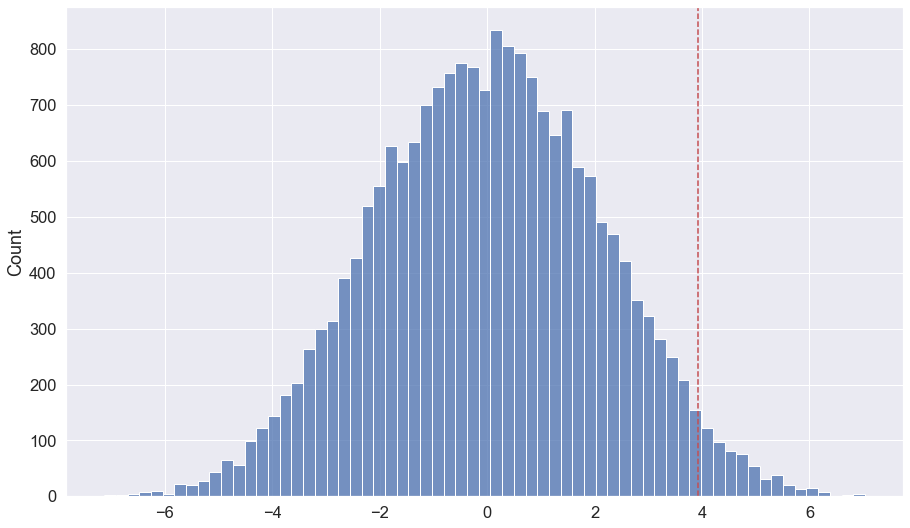

In [10]:
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()

In [11]:
print('Results more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
print('Total results:', len(mu_diff_samples))

p_value = sum([el > mu_diff for el in mu_diff_samples])/n
print('p-value:', sum([el >= mu_diff for el in mu_diff_samples]), '/', len(mu_diff_samples), '=', p_value)

Results more extreme than observed: 595
Total results: 20000
p-value: 595 / 20000 = 0.02975


In [12]:
alpha = 0.05

if p_value <= alpha: 
    print('H0 rejected: the observed result is statistically significant | p-value <= alpha')
else: 
    print('H0 accepted | the observed result is not statistically significant | p-value > alpha')

H0 rejected: the observed result is statistically significant | p-value <= alpha


#### Conclusions

Assuming that, there is no difference between the average consumption of poultry and fish, using a significance level of 5%, the calculated p-value (simulated test statistic under null hypothesis) there is a possibility of **2.9%** of obtaining extreme values at least as much as the actual observed result, and therefore observing a difference between the two averages.